In [45]:
import os, sys
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.utils import to_categorical
print(tf.__version__)

2.10.1


In [19]:
# function used to add category name to the filenames
def rename(path:str, filenames:list, category:str) -> None:
    for file in filenames:
        # e.g. D:\pen\20230702_233001.jpg
        old_fullName = os.path.join(path, file) 
        # e.g. 20230702_233001
        old_fileName = os.path.splitext(file)[0]
        # e.g. pen-20230702_233001.jpg
        new_fileName = category + "-" + old_fileName + ".jpg"
        new_fullName = os.path.join(path, new_fileName)
        
        # rename the file
        os.rename(old_fullName,new_fullName)

In [20]:
pen_path = "D:\\pen"
eraser_path = "D:\\eraser"
stapler_path = "D:\\stapler"

pen_filenames = os.listdir(pen_path)
eraser_filenames = os.listdir(eraser_path)
stapler_filenames = os.listdir(stapler_path)

rename(pen_path, pen_filenames, "pen")
rename(eraser_path, eraser_filenames, "eraser")
rename(stapler_path, stapler_filenames, "stapler")

In [21]:
n = "eraser-20230702_233316.jpg"
n.split("-")[0]

'eraser'

In [31]:
path = "D:\\pictures"
filenames = os.listdir(path)
imgs = np.ndarray([0, 112, 112, 3], dtype=float)
labels = []
random.shuffle(filenames)

with tqdm(range(len(filenames))) as ids:
    for i in ids:
        img = cv2.imread(path + "\\" + filenames[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (112,112))
        img = img.astype(float)/255.0
        img = np.expand_dims(img, axis=0)
        imgs = np.concatenate((imgs, img), axis=0)
        labels.append(filenames[i].split('-')[0])

100%|████████████████████████████████████████████████████████████████████████████████| 182/182 [00:01<00:00, 95.88it/s]


In [32]:
num = len(filenames)
splitLine = int(0.8*num)

# generate a random list to select data randomly
index = [i for i in range(0, num)]
random.shuffle(index)

# divide into trainset and testset
trainset = imgs[index[0:splitLine]]
testset = imgs[index[splitLine:num]]

In [33]:
train_label = np.array(labels)[index[0:splitLine]]
test_label = np.array(labels)[index[splitLine:num]]

print(test_label)
print(train_label)

['pen' 'pen' 'eraser' 'eraser' 'stapler' 'stapler' 'pen' 'stapler' 'pen'
 'eraser' 'eraser' 'eraser' 'pen' 'stapler' 'stapler' 'pen' 'stapler'
 'stapler' 'eraser' 'eraser' 'eraser' 'eraser' 'eraser' 'pen' 'stapler'
 'eraser' 'pen' 'stapler' 'pen' 'pen' 'pen' 'pen' 'stapler' 'stapler'
 'eraser' 'stapler' 'stapler']
['eraser' 'pen' 'eraser' 'eraser' 'pen' 'eraser' 'eraser' 'stapler'
 'stapler' 'eraser' 'stapler' 'pen' 'eraser' 'pen' 'stapler' 'pen'
 'stapler' 'pen' 'eraser' 'eraser' 'pen' 'stapler' 'stapler' 'eraser'
 'stapler' 'stapler' 'stapler' 'pen' 'stapler' 'eraser' 'eraser' 'eraser'
 'eraser' 'eraser' 'stapler' 'stapler' 'eraser' 'stapler' 'eraser'
 'eraser' 'stapler' 'eraser' 'pen' 'pen' 'stapler' 'eraser' 'pen' 'pen'
 'eraser' 'stapler' 'stapler' 'eraser' 'pen' 'eraser' 'eraser' 'eraser'
 'stapler' 'stapler' 'eraser' 'stapler' 'eraser' 'pen' 'pen' 'stapler'
 'stapler' 'pen' 'pen' 'stapler' 'eraser' 'stapler' 'eraser' 'stapler'
 'stapler' 'pen' 'stapler' 'pen' 'stapler' 'stapler'

In [34]:
len(testset)

37

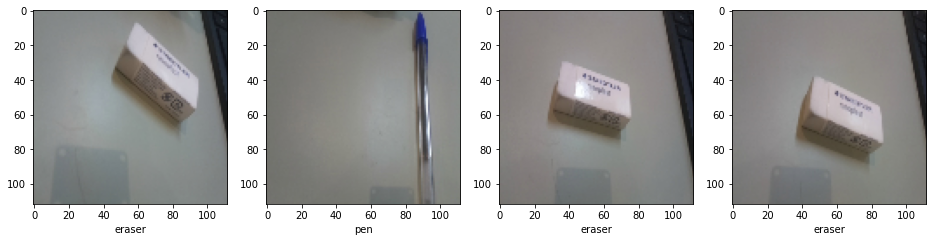

In [35]:
plt.figure(figsize=(16,6))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(trainset[i]) # 第n批的第[i]张图片 每一批里面[0]是图片,[1]是标签
    plt.xlabel(train_label[i])

In [53]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

sizeX, sizeY = 112, 112
input_shape = (sizeX, sizeY, 3)
num_classes = 3

label_encoder = LabelEncoder()
train_label_int = label_encoder.fit_transform(train_label)

model = keras.Sequential([
    keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 108, 108, 16)      1216      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 50, 50, 32)        12832     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 20000)             0         
                                                                 
 dense_15 (Dense)            (None, 120)              

In [55]:
# Convert labels to one-hot encoded format
train_label_encoded = to_categorical(train_label_int, num_classes=num_classes)

model.fit(x=trainset,
          y=train_label_encoded,
          batch_size=batch_Size,
          epochs=10,
          verbose=1)

Epoch 1/10
5/5 [==============================] - 2s 215ms/step - loss: 1.1990 - accuracy: 0.2483
Epoch 2/10
5/5 [==============================] - 1s 237ms/step - loss: 1.0337 - accuracy: 0.4138
Epoch 3/10
5/5 [==============================] - 1s 218ms/step - loss: 0.8915 - accuracy: 0.6000
Epoch 4/10
5/5 [==============================] - 1s 206ms/step - loss: 0.6691 - accuracy: 0.7448
Epoch 5/10
5/5 [==============================] - 1s 215ms/step - loss: 0.4533 - accuracy: 0.9034
Epoch 6/10
5/5 [==============================] - 1s 210ms/step - loss: 0.2424 - accuracy: 0.9586
Epoch 7/10
5/5 [==============================] - 1s 214ms/step - loss: 0.1476 - accuracy: 0.9379
Epoch 8/10
5/5 [==============================] - 1s 210ms/step - loss: 0.1543 - accuracy: 0.9379
Epoch 9/10
5/5 [==============================] - 1s 203ms/step - loss: 0.0771 - accuracy: 0.9724
Epoch 10/10
5/5 [==============================] - 1s 208ms/step - loss: 0.0594 - accuracy: 0.9724


In [59]:
test_label_int = label_encoder.fit_transform(test_label)
test_label_encoded = to_categorical(test_label_int, num_classes=num_classes)

print(test_label)
print(test_label_int)
print(test_label_encoded)


['pen' 'pen' 'eraser' 'eraser' 'stapler' 'stapler' 'pen' 'stapler' 'pen'
 'eraser' 'eraser' 'eraser' 'pen' 'stapler' 'stapler' 'pen' 'stapler'
 'stapler' 'eraser' 'eraser' 'eraser' 'eraser' 'eraser' 'pen' 'stapler'
 'eraser' 'pen' 'stapler' 'pen' 'pen' 'pen' 'pen' 'stapler' 'stapler'
 'eraser' 'stapler' 'stapler']
[1 1 0 0 2 2 1 2 1 0 0 0 1 2 2 1 2 2 0 0 0 0 0 1 2 0 1 2 1 1 1 1 2 2 0 2 2]
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [60]:
model.evaluate(testset,test_label_encoded)

2/2 [==============================] - 0s 27ms/step - loss: 0.2058 - accuracy: 0.9189


[0.20580685138702393, 0.9189189076423645]

2/2 [==============================] - 0s 18ms/step


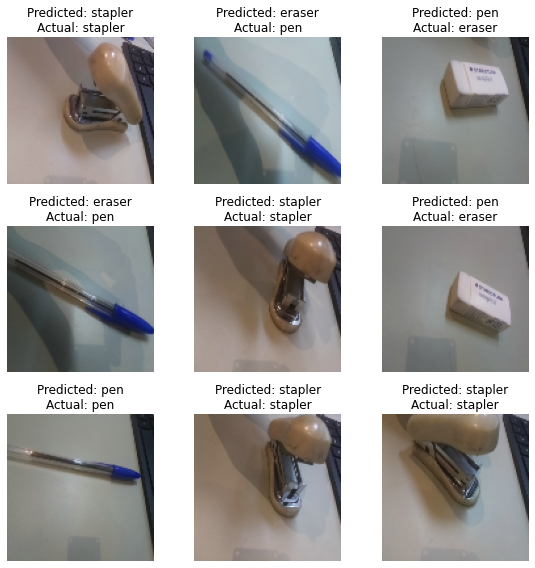

In [66]:
# Make predictions on the test dataset
predictions = model.predict(testset)
predicted_classes = np.argmax(predictions, axis=1)

# Map integer labels back to category names
reverse_label_mapping = {0: 'pen', 1: 'eraser', 2: 'stapler'}
predicted_labels = [reverse_label_mapping[pred_class] for pred_class in predicted_classes]
actual_labels = test_label

# Select four random indices
random_indices = random.sample(range(len(testset)), 9)

# Display randomly selected images with predicted and actual labels
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    image_index = random_indices[i]
    ax.imshow(testset[image_index])
    ax.set_title(f"Predicted: {predicted_labels[image_index]}\nActual: {actual_labels[image_index]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [67]:
predictions

array([[8.0033854e-02, 9.1935897e-01, 6.0718873e-04],
       [1.4865103e-01, 8.4929866e-01, 2.0503448e-03],
       [9.8986632e-01, 1.6728201e-04, 9.9663371e-03],
       [9.9789184e-01, 6.4686179e-04, 1.4612337e-03],
       [3.0227844e-04, 7.8668882e-07, 9.9969697e-01],
       [5.7985180e-04, 6.1992131e-07, 9.9941957e-01],
       [8.5651803e-01, 9.0477720e-02, 5.3004283e-02],
       [2.2480858e-03, 4.7041303e-06, 9.9774724e-01],
       [4.3504423e-01, 5.6370467e-01, 1.2511028e-03],
       [9.9567139e-01, 7.5594522e-04, 3.5727024e-03],
       [7.3496389e-01, 2.6389891e-01, 1.1372151e-03],
       [9.0960002e-01, 8.6307935e-02, 4.0919897e-03],
       [8.9868088e-05, 9.9990904e-01, 1.0626277e-06],
       [4.8349611e-03, 2.5591335e-06, 9.9516255e-01],
       [6.7045832e-05, 6.3335614e-07, 9.9993229e-01],
       [5.5491877e-01, 4.3969229e-01, 5.3889561e-03],
       [3.4047855e-05, 3.2207527e-07, 9.9996567e-01],
       [2.5763644e-03, 2.3602476e-07, 9.9742341e-01],
       [9.9339479e-01, 8.488

In [68]:
predicted_classes

array([1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       0, 1, 2, 0, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 2], dtype=int64)